In [1]:
import cPickle as pickle
import matplotlib.pylab as pl
%matplotlib inline

In [2]:
N_ROUNDS = 4
accuracy_tables = []
mean_table, minimum_table, maximum_table = [], [], []
identifier = 'info/shrinked-mnist-residual-network-%d-round-%d'
for N in range(1, 21):
    accuracies = tuple(pickle.load(open(identifier % (N, r), 'r'))[0] for r in range(N_ROUNDS))
    accuracy_tables.append(accuracies)
    mean_table.append(sum(accuracies) / float(N_ROUNDS))
    minimum_table.append(min(accuracies))
    maximum_table.append(max(accuracies))

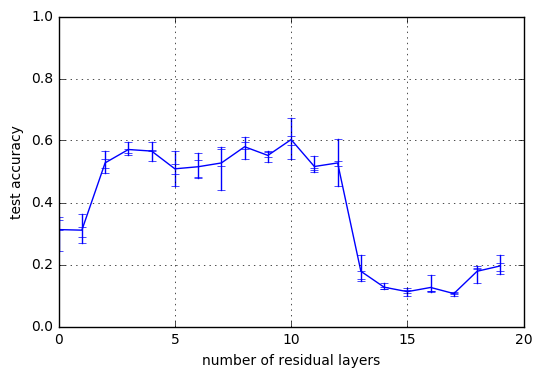

In [4]:
for table in zip(*accuracy_tables):
    pl.plot(range(len(table)), table, 'b_')
for index, bounds in enumerate(zip(minimum_table, maximum_table)):
    pl.plot((index, index), bounds, 'b')
pl.plot(range(len(mean_table)), mean_table, 'b')
pl.xlabel('number of residual layers')
pl.ylabel('test accuracy')
pl.ylim(0, 1)
pl.grid()